# Logistic Regression

**We are gonna practise it using a kaggel problem called Titanic: Machine learning from disaster**

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [62]:
train = pd.read_csv('titanic_train.csv')

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# to show where is the missing data
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


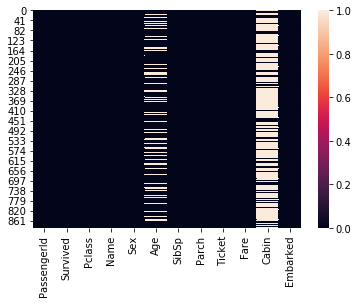

In [50]:
sns.heatmap(train.isnull())

we are missing some age information and a lot of cabin information

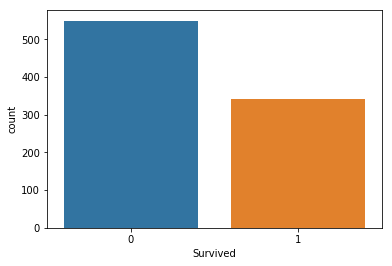

In [10]:
sns.countplot(x='Survived', data=train)

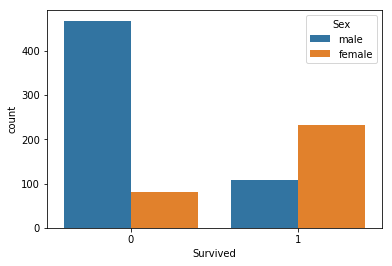

In [12]:
sns.countplot(x='Survived', data=train, hue='Sex')

we notice that the chance of surviving as a female is higher!

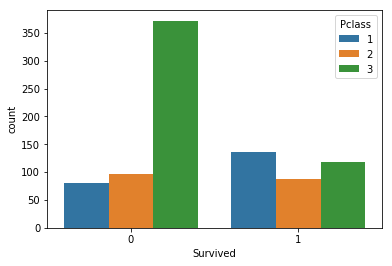

In [13]:
sns.countplot(x='Survived', data=train, hue='Pclass')

more than half of passengers from class 1 survivrd,class 2 around the half, class 3 around a fifth of the total number

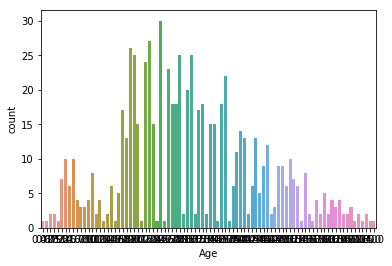

In [14]:
sns.countplot(x='Age', data=train)

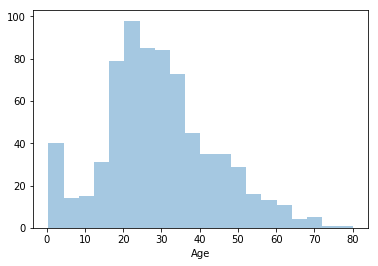

In [19]:
sns.distplot(train['Age'].dropna(), kde=False)

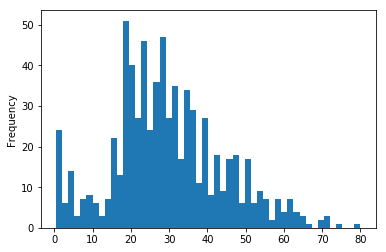

In [21]:
train['Age'].plot('hist',bins=50)

# Cleaning data

In [63]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

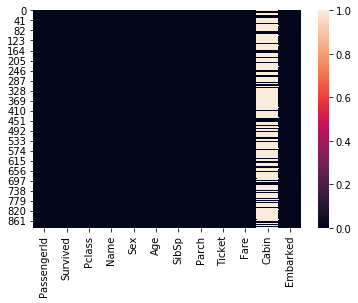

In [53]:
sns.heatmap(train.isnull())

In [64]:
train.drop('Cabin', axis=1, inplace=True)

**now we are gonna change our categorical data into numerical indexes**

In [55]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [65]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [66]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [67]:
train = pd.concat([train,sex,embark], axis=1)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [71]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [73]:
train.drop('PassengerId', axis=1,inplace=True)

In [74]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x= train.drop('Survived', axis=1)
y= train['Survived']

In [98]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lgm = LogisticRegression()

In [105]:
lgm.fit(x_train, y_train)

C:\Users\Assaad\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
prediction = lgm.predict(x_test)

# Confusion Matrix

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.65      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
print(confusion_matrix(y_test, prediction))

[[134  20]
 [ 40  74]]
